 Enter the File name: 	I3


C:\Users\Pushkar\AppData\Local\Temp\ipykernel_23872\4274871669.py:417: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dist.insert(loc = dist.shape[1],column = cities[i], value = 0)
C:\Users\Pushkar\AppData\Local\Temp\ipykernel_23872\4274871669.py:421: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dist.insert(loc = 0, column = 'cities', value = 0)


Which algorithm do you want to use 
 1. HillClimbing 	 2.Simulated Annealing 	 3.Initial Solution 
1
Enter the number of iterations: 500
Route for truck 1 is:  [24, 69, 14, 82, 11, 86, 65, 35, 8, 97]
Route for truck 2 is:  [12, 87, 77, 63, 91, 39, 64, 80, 62, 41]
Route for truck 3 is:  [90, 76, 92, 20, 49, 21, 43, 74, 88, 55]
Route for truck 4 is:  [0, 19, 42, 60, 93, 51, 5, 25, 54, 7]
Route for truck 5 is:  [70, 15, 59, 94, 4, 61, 75, 85, 68, 95]
Route for truck 6 is:  [72, 34, 98, 46, 38, 31, 57, 28, 26, 79]
Route for truck 7 is:  [18, 99, 81, 50, 2, 58, 48, 22, 84, 47]
Route for truck 8 is:  [10, 67, 66, 89, 52, 16, 9, 23, 32, 1]
Route for truck 9 is:  [36, 40, 44, 71, 78, 6, 83, 45, 33, 17]
Route for truck 10 is:  [96, 56, 13, 53, 30, 37, 3, 27, 73, 29]
Minimum Cost for the above Routes is:  6086.388063806141
Feasibility:  0
File not found!


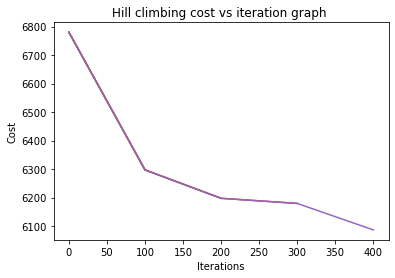

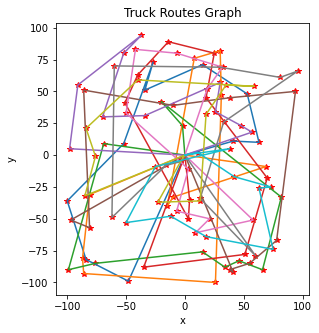

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pickle


class assignments:

    def initialSolution(distances,filename):
    #varible used to fetch the min value from the dataframe
        counter = 0
        
        customerDist = distances[0,1:]
        customerDistance = pd.DataFrame(customerDist)
        #sorting the dataframe in ascending order
        customerDistance = customerDistance.sort_values(by = [0])
        solution = []
        for i in range(int(trucks)):
            route = []
            route.append(0)
            for j in range(int(locations)):
                #functionality to choose even city at start and odd city at the end
                if j == 0 or j == int(locations) - 1:
                    flag = 0
                    while flag == 0:
                        nextCity = customerDistance.index[counter]
                        if (j == 0 and nextCity % 2 == 0) or (j == int(locations) - 1 and nextCity % 2 !=0): 
                            route.append(nextCity+1)
                            customerDistance = customerDistance.drop(nextCity)
                            flag = 1
                            counter = 0
                            # if only even or only odd cities are left the allowing to choose any city for the last route
                        elif len(customerDistance) <= int(locations):
                            nextCity = customerDistance.index[counter]
                            route.append(nextCity+1)
                            customerDistance = customerDistance.drop(nextCity)
                            counter = 0
                            flag = 1
                            #if the first city in the sorted dataframe is not even or odd the look for the next even or odd city
                        else:
                            counter += 1
                    
                    
                else:
                    nextCity = customerDistance.index[counter]
                    route.append(nextCity+1)
                    customerDistance = customerDistance.drop(nextCity)
                    counter = 0
            solution.append(route)  
        routelength = []
        #creating a list of route lengths
        for s in solution:
            length = 0
            for i in range(len(s)):
                length += distances[s[i-1],s[i]]
            routelength.append(length)            
        print(routelength)
    #calculate  ∆ and add to total distance travelled i.e the cost
        cost = assignments.objective(routelength)

    
    

    #making the solution into original format as all cities were incremented by 1 and origin was introduced as 0 for programming functionality
        Solution = []
        for s in solution:
            s = [x-1 for x in s]
            Solution.append(s[1:])
        
        t= 1
        for s in Solution:
            print(f"Route for truck {t} is: ",s)
            t += 1
            
        print("Minimum Cost for the above Routes is: ",cost)
        
        feasibility = 0
    #calculating the feasibility of the solution
        feasibility = assignments.feas_ibility(Solution)
        print("Feasibility: ",feasibility)
    #genertaing the CSV file with outputs
        assignments.to_file(cost,feasibility,Solution)
    
    #plotting the truck routes
        fig = plt.figure(figsize=(10,5))
        fig.add_subplot(122)
        plt.plot(file['x'], file['y'], 'r*')
        assignments.plot(file,Solution)

    #creating the pickle file
        pklfilename = filename+'.pkl'
        assignments.picklefile(pklfilename,Solution,cost,feasibility)         
        


 #Function to generate random solution at the start
    def randomSolution(distances,locations,cities,trucks):
        flag = 0
        
        while flag == 0 :
            Cities = cities.copy()
            solution = []
            
            #randomly selecting cities from the list of available cities
            for i in range(int(locations)+1):
                randomCity = random.sample(Cities, 1)
                solution.append(randomCity[0])
                Cities.remove(randomCity[0])
                
            #only selecting random solution where the first city as even and last city is odd
            #here the first element is -1 , for referring to origin for functionality within the code
            if solution[0] == -1 and solution[1] % 2 == 0 and solution[-1] % 2 != 0:
                flag = 1
        
            # if only odd or even cities are left for the last truck then accept the solution as no other choice left
            elif  len(cities)-1 == trucks and (assignments.IsListOdd(solution[1:]) == True or assignments.IsListEven(solution[1:])== True) and solution[0] == -1:
                flag = 1
        return solution
    


    
    
    #Function to calculate total distance of a particular route
    def routeLength(distances,solution):
        routeLength = 0
        for i in range(len(solution)):
            routeLength += distances[solution[i-1]+1,solution[i]+1]
        return routeLength


    #Function to check if all the elements within the list are even
    def IsListEven(my_list):

        allEven = True

        for i in range(1,len(my_list)):

            if my_list[i] % 2 != 0:

                allEven = False
     
        return allEven
    #Function to check if all the elements within the list are odd
    def IsListOdd(my_list):
    
        allOdd = True

        for i in range(1,len(my_list)):

            if my_list[i] % 2 != 1:

                allOdd = False

        return allOdd
    
    #Function to find neighbours of routes i.e find all the possible combinations of a particular route
    def getNeighbours(solution,cities,trucks):
        neighbours = []
        for i in range(len(solution)):
            for j in range(i+1,len(solution)):
                neighbour = solution.copy()
                neighbour[i] = solution[j] 
                neighbour[j] = solution[i]
                #fetching the neighbours which satisfy the even/odd city constraint
                if neighbour[0] == -1 and neighbour[1] % 2 == 0 and neighbour[-1] % 2 != 0:
                    neighbours.append(neighbour)
            
        return neighbours

    #Function to get the bes neighbour among all possible combinations
    def getBestNeighbour(distances,neighbours):
        bestRouteLength = assignments.routeLength(distances,neighbours[0])
        bestNeighbour = neighbours[0]
        #comparing all the possible neighbours and returning the neighbour with the least cost
        for neighbour in neighbours:
            currentRouteLength = assignments.routeLength(distances,neighbour)
            if currentRouteLength < bestRouteLength:
                bestRouteLength = currentRouteLength
                bestNeighbour = neighbour   
        return bestNeighbour, bestRouteLength 


    #Function to implement SIMULATED ANNEALING to the hillclibing algorithm and get best Neighbour
    def getBestNeighbourSimulatedAnnealing(distances,neighbours,iterations):
        bestRouteLength = assignments.routeLength(distances,neighbours[0])
        bestNeighbour = neighbours[0]
    
        temp = 100
        factor  = 0.01
    
        for i in range(iterations):
        
            temp = temp * factor
            for neighbour in neighbours:
                currentRouteLength = assignments.routeLength(distances,neighbour)
                if currentRouteLength < bestRouteLength:
                    bestRouteLength = currentRouteLength
                    bestNeighbour = neighbour 
                else:
                    x = np.random.uniform()
                    if x < np.exp((bestRouteLength - currentRouteLength )/temp):
                        bestRouteLength = currentRouteLength
                        bestNeighbour = neighbour
                    
        return bestNeighbour, bestRouteLength 

    # Function to calculate total distance travelled by the trucks plus ∆
    def objective(routeLengths):
        totalDistance = 0
        for i in range(len(routeLengths)):
            totalDistance += routeLengths[i]
        
        delta = max(routeLengths) - min(routeLengths)
    
        cost = totalDistance + delta
        return cost

    # Function to calculate Feasibilty of routes
    def feas_ibility(routes):
        feasibility = 0
        for i in range(int(trucks)):
            if routes[i][0] % 2 != 0 or routes[i][-1] % 2 == 0:
                feasibility += 1
        return feasibility
    
    # Function which SWAPS values and maintains minimum cost
    def minCost(currentCost,current_routes):
        # minimum = 0
        global init_cost
        global best_routes
        if currentCost <= init_cost:
            init_cost = currentCost
            best_routes = current_routes
                
        return init_cost, best_routes
    
    # function to create output CSV file    
    def to_file(min_cost, feasibility,routes):
    
    
        with open('sol.csv', 'w') as writeFile:
            for i in range(int(trucks)):
                route = routes[i]
                writeFile.write(','.join(str(s) for s in route))
                writeFile.write('\n')
            writeFile.write(str(min_cost))
            writeFile.write('\n')
            writeFile.write(str(feasibility))

    #function to implement hillclimbing algorithm
    def hillclimbing(distances,trucks,locations,iterations,choice,file,filename):
        it=[]  #list to store iterations, used for plotting iterations VS cost graph
        sol=[]  #list to store cost, used for plotting iterations VS cost graph
    
        #variables used for calculating cost
        global init
        global init_cost
        for i in range(iterations):
            #variables used for calculating routes / routelength
            routeLengths = []
            current_routes = pd.DataFrame(columns = ["Route"])
            cities = list(range(len(distances)))
            cities = [x-1 for x in cities]
            for j in range(trucks):
                #generating random solution at the start
                currentSolution = assignments.randomSolution(distances,locations,cities,trucks)
                #calculating routelength of the random solution 
                currentRouteLength = assignments.routeLength(distances,currentSolution)
                #finding all possible combinations/neighbours of the random solution
                neighbours = assignments.getNeighbours(currentSolution,cities,trucks)
                
                #finding the best neighbour/combination with the least cost
                if neighbours:
                    if choice == 1:
                        bestNeighbour, bestNeighbourRouteLength = assignments.getBestNeighbour(distances,neighbours)
                    else:
                        bestNeighbour, bestNeighbourRouteLength = assignments.getBestNeighbourSimulatedAnnealing(distances,neighbours,iterations)
                    while bestNeighbourRouteLength < currentRouteLength:
                        currentSolution = bestNeighbour
                        currentRouteLength = bestNeighbourRouteLength
                        neighbours = assignments.getNeighbours(currentSolution,cities,trucks)
                        if neighbours:
                            if choice == 1:
                                bestNeighbour, bestNeighbourRouteLength = assignments.getBestNeighbour(distances,neighbours)
                            else:
                                bestNeighbour, bestNeighbourRouteLength = assignments.getBestNeighbourSimulatedAnnealing(distances,neighbours,iterations)
                        else:
                            bestNeighbour, bestNeighbourRouteLength  = currentSolution , currentRouteLength
      
                else:
                    bestNeighbour, bestNeighbourRouteLength  = currentSolution , currentRouteLength
    
        
                # list of routelengths for a particular iteration
                routeLengths.append(bestNeighbourRouteLength)
            
                current_routes.at[len(current_routes),'Route'] = bestNeighbour[1:]
            
                cities = [x for x in cities if x not in currentSolution]
                cities.insert(0,-1)
               
            currentCost = assignments.objective(routeLengths)
            if init == 0:
                init_cost = currentCost
                init = 1
        
            #storing minimum cost and routes by comparing with cost in each iteration
            minimumCost , routes = assignments.minCost(currentCost,current_routes)
        
        
            #Plotting the iterations VS Cost graph
            if i % 100 == 0:
                it = it + [i]
                sol = sol + [minimumCost]
                plt.title('Hill climbing cost vs iteration graph ')
                plt.ylabel('Cost') # Label to the axis
                plt.xlabel('Iterations')
                plt.plot(it,sol)
    
    
        # creating a list of solution which consists of all the truck routes
        global solution
        solution = []
        for i in range(trucks):
             solution.append(routes.iloc[i]['Route'])
        
        t= 1
        for s in solution:
            print(f"Route for truck {t} is: ",s)
            t += 1
            
        print("Minimum Cost for the above Routes is: ",minimumCost)
    
    
        #calculating the feasibility of the solution
        feasibility = 0
        feasibility = assignments.feas_ibility(solution)
        
        print("Feasibility: ",feasibility)
    
        #generating CSV file to store the results
        assignments.to_file(minimumCost,feasibility,solution)
    
    
        #producing plots of the routes
        fig = plt.figure(figsize=(10,5))
        fig.add_subplot(122)
        plt.plot(file['x'], file['y'], 'r*')
        assignments.plot(file,solution)
    
    
        #generating the pickle file
        pklfilename = filename +'.pkl'
        assignments.picklefile(pklfilename,solution,minimumCost,feasibility)
        
        return solution, minimumCost , feasibility


    # plotting truck routes
    def plot(file,routeslist):
        
        for route in routeslist:
            x = [0]+[file['x'][file['ID']==i].tolist()[0] for i in route]+[0]
            y = [0]+[file['y'][file['ID']==i].tolist()[0] for i in route]+[0]
            plt.plot(x,y)
            plt.ylabel('y') # axis label
            plt.xlabel('x') # axis label
            plt.title('Truck Routes Graph') # Title of the plot
            plt.grid()
        return 

    # function to create pickle file which creates log of previous results
    def picklefile(pklfilename, solutionlist, cost, feasibility):
            try:
                pickleFile = open(pklfilename, "rb") # Read the file
                previous = pickle.load(pickleFile)
                print("Previous result (pickle file) :" ,previous)
                pickleFile.close()
            except FileNotFoundError:
                print("File not found!")  
            
            Result = [pklfilename, solutionlist, cost, feasibility]    # if no file then create new file
            pickleFile = open(pklfilename, "wb")
            pickle.dump(Result,pickleFile) # store result pickle file
            pickleFile.close()
    
def main():
#Task 1: (2 marks) Your first task is to write a Python program that asks the user for the input
#file name and then reads the coordinates of the customer locations from this file.
    global file
    
    filename = input(" Enter the File name: \t")
    csvfile = filename + '.csv'
   
    file = pd.read_csv(csvfile)



#Creating an array(list of list) distance between the co-ordinates of locations.
    file['origin'] = 0

    for i in range(0,len(file)):
        file.loc[i]['origin'] = math.sqrt((file.loc[i][1] - 0)**2 + (file.loc[i][2] - 0)**2)
    

# creating a list of cities
    cities = file["ID"]
    cities = cities.tolist()
    cities.insert(0,'origin')

    dist = pd.DataFrame()
# converting the list of cities into a dataframe
    for i in range(0, len(cities)):
        dist.insert(loc = dist.shape[1],column = cities[i], value = 0)
        
    
    cities = pd.Series(cities)
    dist.insert(loc = 0, column = 'cities', value = 0)
    dist.fillna(value = 0,inplace = True)
    dist['cities'] = cities


    dist.drop(columns = 'cities',inplace = True)    
    distances = dist.to_numpy()
    
    length = len(file)

# creating distance matrix between the origin and cities
    distances[0,0]= 0
    for i in range(1,length + 1):
        distances[i,0]= math.sqrt((file.iloc[i-1,1] - 0)**2 + (file.iloc[i-1,2] - 0)**2)
        distances[0,i]= math.sqrt((file.iloc[i-1,1] - 0)**2 + (file.iloc[i-1,2] - 0)**2)
 
    
    for i in range(1,length + 1):
        x=i-1
        for j in range(1, length + 1):
            distances[i,j] = math.sqrt((file.iloc[j-1]['x'] - file.iloc[x]['x'])**2 + (file.iloc[j-1]['y'] - file.iloc[x]['y'])**2)
        
    # Number of customers
    global n
    n = len(distances) - 1
    
    # Number of available trucks
    global trucks
    trucks = math.sqrt(n)
    
    
    #Number of deliveries per truck
    global locations
    locations = n/trucks

    global init
    global init_cost 
    init_cost = 0
    
    init = 0
    
    
    
    #asking the user for 
    choice = int(input("Which algorithm do you want to use \n 1. HillClimbing \t 2.Simulated Annealing \t 3.Initial Solution \n"))
    if choice == 3:
        assignments.initialSolution(distances,filename)
    else:
        iterations = int(input("Enter the number of iterations: "))
        assignments.hillclimbing(distances,int(trucks),int(locations),iterations,choice,file,filename)
   
    
    
"""
Main function
"""   
if __name__ == "__main__":
    main()
 